In [1]:
import os 
import pandas as pd
import numpy as np

# import sklearn methods 
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import sys 
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")
    
    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n")

    #print FP, FN
    str_out += ("FALSE POSITIVES:\n")
    fp = conf_mat[1][0]
    pos_labels = conf_mat[1][0]+conf_mat[1][1]
    str_out += ("{} out of {} positive labels ({:.4f}%)\n".format(fp, pos_labels,fp/pos_labels))
    str_out += ("\n")

    str_out += ("FALSE NEGATIVES:\n")
    fn = conf_mat[0][1]
    neg_labels = conf_mat[0][1]+conf_mat[0][0]
    str_out += ("{} out of {} negative labels ({:.4f}%)\n".format(fn, neg_labels, fn/neg_labels))
    str_out += ("\n")

    
    #print classification report
    str_out += ("PRECISION, RECALL, F1 scores:\n")
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

# MERGED DATA

The best parameters are {} with a score of 0.6644
TEST SCORES

ACCURACY: 0.6643

CONFUSION MATRIX:
[[189339  10106  50264]
 [ 62732  81252  54336]
 [ 51671  13631 209685]]

FALSE POSITIVES:
62732 out of 143984 positive labels (0.4357%)

FALSE NEGATIVES:
10106 out of 199445 negative labels (0.0507%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68    249709
           1       0.77      0.41      0.54    198320
           2       0.67      0.76      0.71    274987

    accuracy                           0.66    723016
   macro avg       0.69      0.64      0.64    723016
weighted avg       0.68      0.66      0.65    723016



([<matplotlib.patches.Wedge at 0x7f5c700740d0>,
 [Text(-0.2425202644399789, 1.072932393646479, 'n_EAR'),
  Text(-0.7627009065364413, 0.7926457766042098, 'n_MAR'),
  Text(-1.0855483341019296, 0.17772117017543396, 'n_MOE'),
  Text(-1.0542526202753837, -0.31392899299441573, 'n_EC'),
  Text(0.1462721079679346, -1.0902313838954634, 'n_LEB'),
  Text(1.0995205242019341, 0.0324748650298011, 'n_SOP'),
  Text(0.746481076489863, 0.8079393556712876, 'PERCLOS'),
  Text(0.0734028788392253, 1.0975481845359292, 'CLOSENESS')],
 [Text(-0.13228378060362483, 0.5852358510798975, '7.08%'),
  Text(-0.4160186762926043, 0.43235224178411436, '10.24%'),
  Text(-0.592117273146507, 0.09693882009569124, '10.21%'),
  Text(-0.5750468837865729, -0.17123399617877222, '4.17%'),
  Text(0.07978478616432795, -0.5946716639429799, '40.87%'),
  Text(0.5997384677465095, 0.01771356274352787, '5.83%'),
  Text(0.4071714962671979, 0.44069419400252047, '19.49%'),
  Text(0.04003793391230471, 0.5986626461105068, '2.13%')])

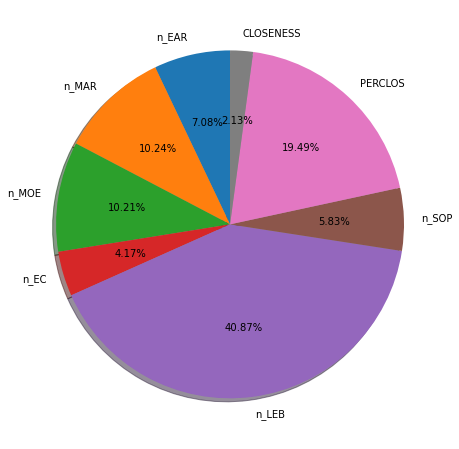

In [3]:
df_original2 = pd.read_pickle('../input/rlddandmerged/merged_normalized_scaled.pkl')

X2 = df_original2.loc[:, ["n_EAR", 
                    "n_MAR", "n_MOE", "n_EC",
                    "n_LEB", "n_SOP", "PERCLOS", "CLOSENESS"]]

y2 = df_original2.loc[:, "DROWSINESS"].map({0: 0, 0.5: 1, 1:2})

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, stratify = y2)

# cross-validation with 5 splits
cross_val = StratifiedShuffleSplit(n_splits=10, random_state = 42)

rf = RandomForestClassifier(random_state = 0,n_estimators=100,max_depth=10)

# parameters 
parameters = {  
#                "n_estimators":[100],
#                "criterion": ["gini","entropy"],
#                "class_weight": [None, "balanced_subsample"],
#                "max_features":[None, "sqrt"],
                }

# grid search for parameters
grid2 = GridSearchCV(estimator=rf, param_grid=parameters, cv=cross_val, n_jobs=-1)#multithreading; all cores are used
grid2.fit(X_train2, y_train2)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid2.best_params_, grid2.best_score_))

# prediction results
y_pred2 = grid2.predict(X_test2)

# print accuracy metrics
results2, false2 = display_test_scores(y_test2, y_pred2)
print(results2)

# plot importances
labels2 = X_train2.columns
plt.figure(figsize=(8,8))
plt.pie(grid2.best_estimator_.feature_importances_, labels=labels2, shadow=True, startangle=90, autopct='%1.2f%%') 